In [1]:
from __future__ import division
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
# import mpld3

In [2]:
df = pd.DataFrame.from_csv('Crimes_-_2001_to_present.csv', infer_datetime_format=True)

In [49]:
df['Date Only'] = pd.to_datetime(df['Date'], format="%m/%d/%Y", exact=False)

In [50]:
df['Year'] = df['Date Only'].dt.year

In [51]:
df.head()

,Date,Primary Type,Date Only,Year
ID,,,,
10028048,04/10/2015 11:45:00 PM,BATTERY,2015-04-10,2015
10028038,04/10/2015 11:40:00 PM,BATTERY,2015-04-10,2015
10028104,04/10/2015 11:38:00 PM,ASSAULT,2015-04-10,2015
10028046,04/10/2015 11:35:00 PM,ASSAULT,2015-04-10,2015
10028704,04/10/2015 11:30:00 PM,ASSAULT,2015-04-10,2015


In [52]:
sexassault_cnt = df[(df['Primary Type'] == 'CRIM SEXUAL ASSAULT')][['Date Only', 'Primary Type', 'Year']]

In [54]:
sexassault_cnt.head()

,Date Only,Primary Type,Year
ID,,,
10027979,2015-04-10,CRIM SEXUAL ASSAULT,2015
10032222,2015-04-09,CRIM SEXUAL ASSAULT,2015
10026230,2015-04-08,CRIM SEXUAL ASSAULT,2015
10025419,2015-04-08,CRIM SEXUAL ASSAULT,2015
10026579,2015-04-07,CRIM SEXUAL ASSAULT,2015


In [8]:
sexassault_cnt['Year'].nunique()

15

In [9]:
sexassault_cnt['Year'].value_counts()

2002    1820
2001    1792
2003    1584
2004    1551
2005    1524
2007    1508
2008    1501
2006    1443
2011    1442
2009    1385
2012    1380
2010    1328
2014    1234
2013    1222
2015     266
dtype: int64

In [10]:
sexassault_cnt_by_day = sexassault_cnt['Date Only'].value_counts()

In [11]:
sexassault_cnt.groupby('Date Only').count().head()

,Primary Type,Year
Date Only,,
2001-01-01,38,38
2001-01-02,2,2
2001-01-03,7,7
2001-01-04,2,2
2001-01-05,6,6


In [12]:
sexassault_cnt_by_day.head()

2010-01-01    41
2005-01-01    40
2004-01-01    40
2001-01-01    38
2008-01-01    38
dtype: int64

In [36]:
sns.set() #reset parameters so they dont layer on top of each other every time you change
sns.set_palette("pastel")
sns.set_style("darkgrid")
sns.set(font_scale=1.5, palette="Set1")


mpl.rc("figure", figsize=(16, 8))
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
# mpl.rc('font', **font)

In [60]:
#sexual assault as percent distribution of all violent crimes per day
all_crimes = df.groupby(['Primary Type','Date Only']).count()
all_crimes.head()

Date  Year
Primary Type Date Only             
ASSAULT      2001-01-01    70    70
             2001-01-02    66    66
             2001-01-03    79    79
             2001-01-04    57    57
             2001-01-05    68    68

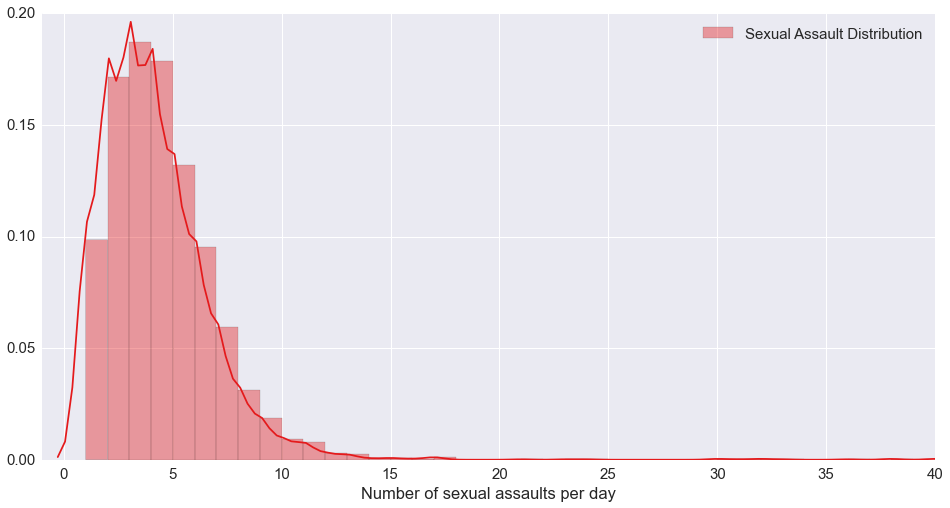

In [37]:
all_label = "Sexual Assault Distribution"
g = sns.distplot(sexassault_cnt_by_day, label=all_label, bins=40, axlabel='Number of sexual assaults per day');
g.set_xlim(-1,40)
plt.legend()
plt.savefig("sexual_assault_distribution")

In [ ]:
g = sns.tsplot(sexassault_cnt_by_day, sexassault_cnt_by_day.index, interpolate=False)
g.set_xlabel('Date')
g.set_ylabel('Number of Sexual Assaults')


In [436]:
sexassault_cnt_by_day.index.dayofweek

array([4, 5, 3, ..., 3, 2, 4], dtype=int32)

In [387]:
sexassault_cnt_by_day.head()

2010-01-01    41
2005-01-01    40
2004-01-01    40
2001-01-01    38
2008-01-01    38
dtype: int64

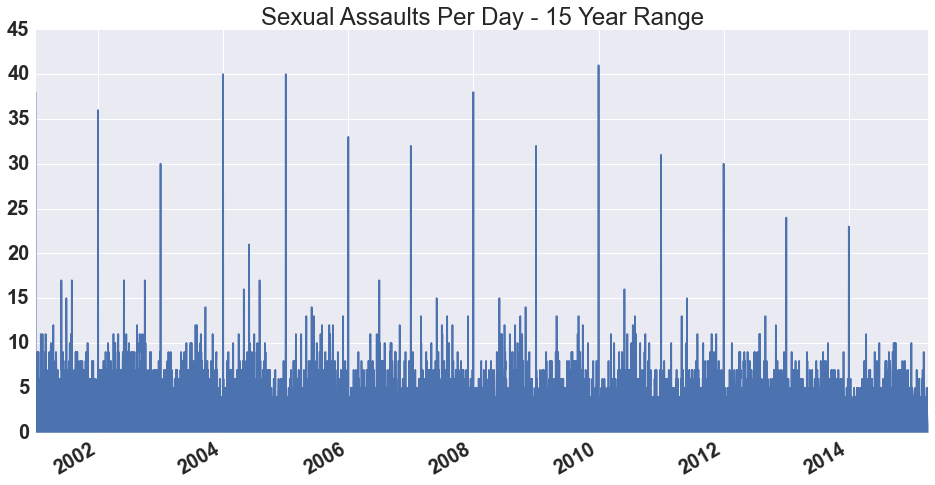

In [711]:
sexassault_cnt_by_day.plot(kind='area')
plt.title('Sexual Assaults Per Day - 15 Year Range')
plt.savefig("sexual_assaults_per_day_15_years")

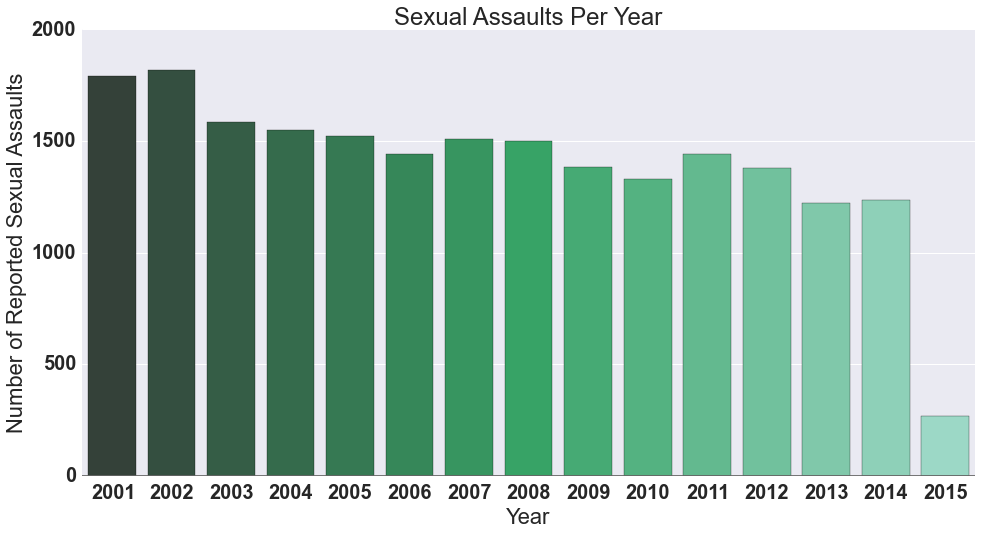

In [704]:
data = sexassault_cnt['Year'].value_counts()
g = sns.barplot(data.index, data.values, palette="BuGn_d", hline=.1)
g.set_xlabel('Year')
g.set_ylabel('Number of Reported Sexual Assaults')
plt.title('Sexual Assaults Per Year')
plt.savefig("sexual_assaults_per_year")

In [399]:
sexassault_cnt[(sexassault_cnt['Date Only'].dt.year == 2010)].head()

,Date Only,Primary Type,Year
ID,,,
7869695,2010-12-31,CRIM SEXUAL ASSAULT,2010
7869306,2010-12-31,CRIM SEXUAL ASSAULT,2010
7870730,2010-12-31,CRIM SEXUAL ASSAULT,2010
7869095,2010-12-31,CRIM SEXUAL ASSAULT,2010
7869381,2010-12-31,CRIM SEXUAL ASSAULT,2010


In [600]:
new_year_2010['New Years'] = int(sexassault_cnt_by_day['2010-01-01'])
all_other_days = sexassault_cnt_by_day['2010-01'].drop(pd.Timestamp('2010-01-01 00:00:00')).sum()
new_year_2010['All other days'] = all_other_days

In [601]:
new_year_2010

New Years         41
All other days    79
dtype: object

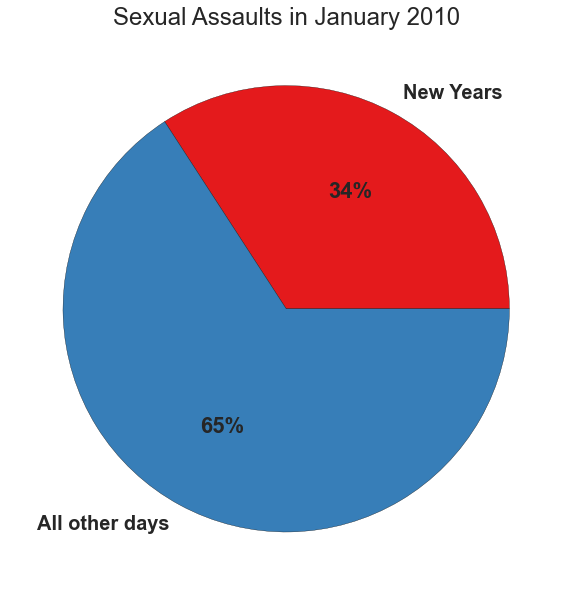

In [706]:
new_year_2010.plot(kind='pie', figsize=(10,10), autopct='%i%%')
plt.title("Sexual Assaults in January 2010")
plt.savefig("sexual_assaults_pie")

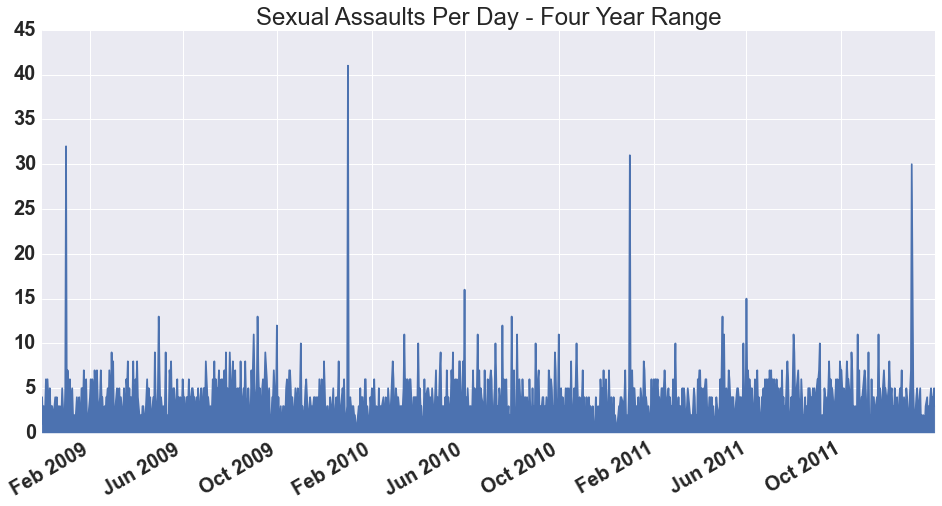

In [710]:
sns.set_palette("deep")
sexassault_cnt_by_day['2008-12':'2012-1'].plot(kind='area')
plt.title('Sexual Assaults Per Day - Four Year Range')
plt.savefig("sexual_assaults_per_day_four_years")

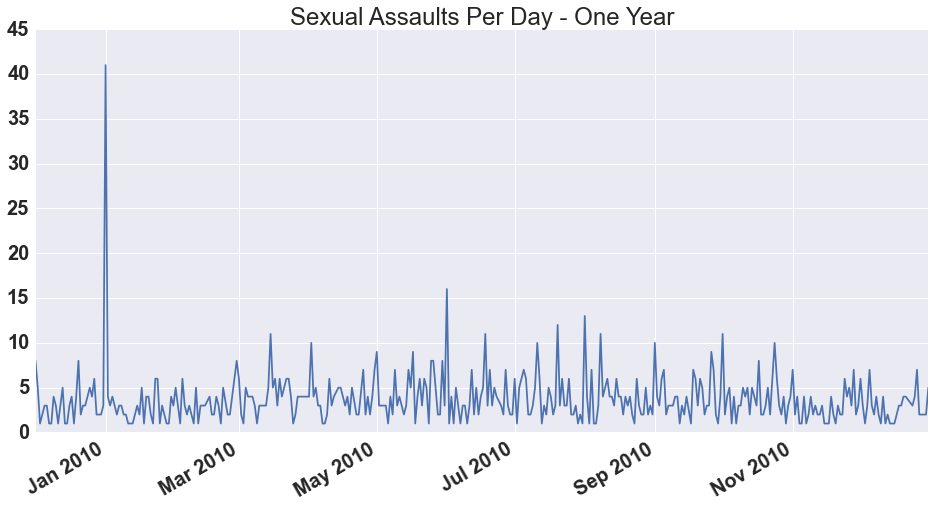

In [712]:
sexassault_cnt_by_day['2009-12':'2010-12'].plot()
plt.title('Sexual Assaults Per Day - One Year')
plt.savefig("sexual_assaults_per_day_one_year")

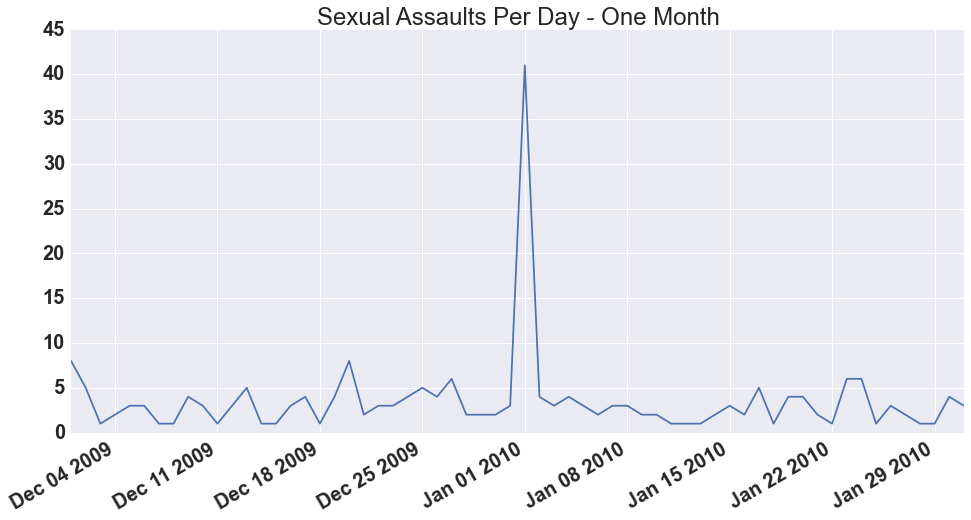

In [713]:
sexassault_cnt_by_day['2009-12':'2010-1'].plot()
plt.title('Sexual Assaults Per Day - One Month')
plt.savefig("sexual_assaults_per_day_one_month")

In [485]:
sexassault_cnt_by_day['2009-12':'2010-12'].sort(sexassault_cnt_by_day.values)

In [470]:
sexassault_cnt_by_day['2009-12':'2010-12'].head()

2010-01-01    41
2010-06-01    16
2010-08-01    13
2010-07-20    12
2010-03-15    11
dtype: int64

In [479]:
avg_day = sexassault_cnt_by_day['2009-12':'2010-12'].mean()
max_day = sexassault_cnt_by_day['2009-12':'2010-12'].max()
sexassault_cnt_by_day['2009-12':'2010-12'].describe()

count    381.000000
mean       3.742782
std        2.965056
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       41.000000
dtype: float64

In [477]:
print("The next largest value is 2.5x smaller than new years.")

The next largest value is 2.5x smaller than new years.


In [505]:
print("In 2010, you were {0}% more likely to be a victim of sexual assault on New Years in Chicago versus the average day.".format(int(max_day/avg_day * 100)))

In 2010, you were 1095% more likely to be a victim of sexual assault on New Years in Chicago versus the average day.


In [67]:
print("Almost 1100% more likely!!!")

Almost 1100% more likely!!!


#Almost 1100% more likely!!!


#compare probability of being victim of any crime on new years to sexual assault
compare above for being victim of violent crime
probability that you will be a victim of sexual assault if you go out on new years
probability that you will be a victim of sexual assault if you are a victim of a crime on new years


#68% of sexual assaults go unreported
Justice Department, National Crime Victimization Survey: 2008-2012

In [ ]:
label the area chart points
highlight each new year in red

taking pictures of sublime text

put actual count of sexual assaults on bar graph